In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
# Load the dataset
df = pd.read_csv('email_dataset.csv')

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['email'], df['label'], test_size=0.2, random_state=42)

In [25]:
# Vectorize the email content using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [26]:
# Train a Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [27]:
# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test_vectorized)

In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [29]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.73
Confusion Matrix:
[[283  30]
 [ 76  11]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.79      0.90      0.84       313
        spam       0.27      0.13      0.17        87

    accuracy                           0.73       400
   macro avg       0.53      0.52      0.51       400
weighted avg       0.68      0.73      0.70       400



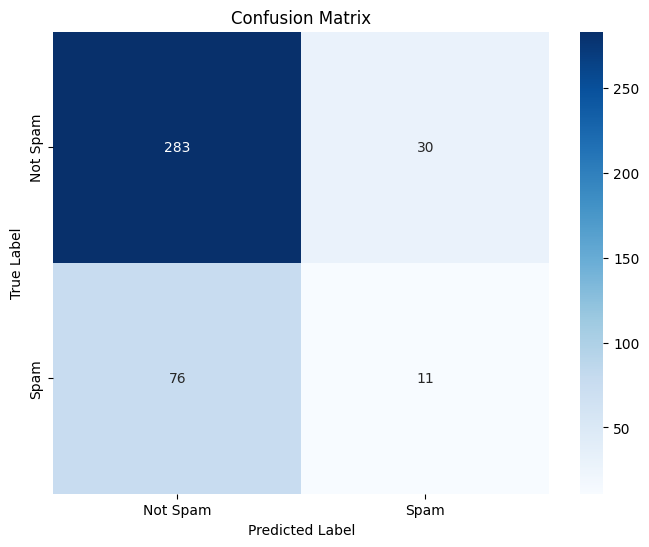

In [31]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[
            'Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])  # type: ignore
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()